# Predicting Data Science Salaries in 2023

This Colab notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting a data scientist's salary in 2023.

I am going to take the following approach:

Problem definition
Data
Evaluation
Features
Modelling
Experimentation

1. Problem Definition
Given parameters about a each data scientist, can I predict their salary in 2023?

There is 1 dataset:

* ds_salaires.csv

2. Data
The original data came from Kaggle https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted prices.

For more on the evaluation of this project check: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

4. Features

Age: The age of the patient. (Numeric)

Data Science Job Salaries Dataset contains 11 columns, each are:

1. work_year: The year the salary was paid.
2. experience_level: The experience level in the job during the year
3. employment_type: The type of employment for the role
4. job_title: The role worked in during the year.
5. salary: The total gross salary amount paid.
6. salary_currency: The currency of the salary paid as an ISO 4217.
currency code.
7. salaryinusd: The salary in USD
8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. remote_ratio: The overall amount of work done remotely
10. company_location: The country of the employer's main office or contracting branch
11. company_size: The median number of people that worked for the company during the year

## Importing the data and preparing it for modeling

In [116]:

# Import TensorFlow into Colab
import tensorflow as tf
import tensorflow_hub as hub

print("TF version", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU is available" if tf.config.list_physical_devices("GPU") else "Not available")

TF version 2.12.0
TF Hub version: 0.13.0
GPU is available


In [117]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
# Checkout the labels of our data
# Import the training and validation set
df = pd.read_csv("drive/MyDrive/Data_Science_Salaries/ds_salaries.csv")
print(df.describe())
print(df.head())

         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000
   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scien

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [120]:
df.head().T

,0,1,2,3,4
work_year,2023,2023,2023,2023,2023
experience_level,SE,MI,MI,SE,SE
employment_type,FT,CT,CT,FT,FT
job_title,Principal Data Scientist,ML Engineer,ML Engineer,Data Scientist,Data Scientist
salary,80000,30000,25500,175000,120000
salary_currency,EUR,USD,USD,USD,USD
salary_in_usd,85847,30000,25500,175000,120000
employee_residence,ES,US,US,CA,CA
remote_ratio,100,100,100,100,100
company_location,ES,US,US,CA,CA


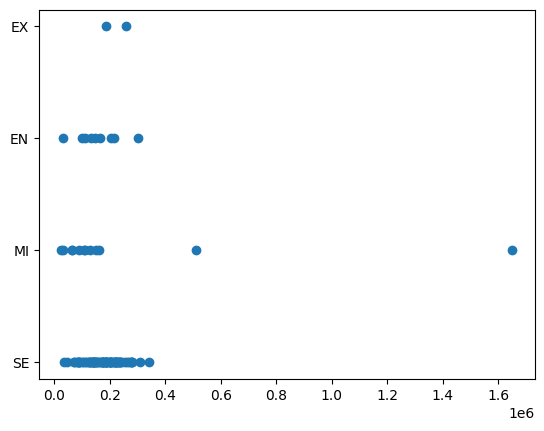

In [121]:
fig, ax = plt.subplots()
ax.scatter(df["salary"][:100], df["experience_level"][:100])

<Axes: ylabel='Frequency'>

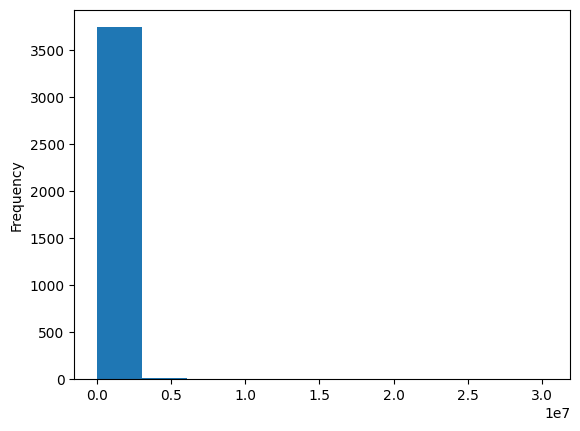

In [122]:
df.salary.plot.hist()

In [123]:
df.salary.head(30)

0      80000
1      30000
2      25500
3     175000
4     120000
5     222200
6     136000
7     219000
8     141000
9     147100
10     90700
11    130000
12    100000
13    213660
14    130760
15    147100
16     90700
17    170000
18    150000
19    150000
20    110000
21    275000
22    174000
23    230000
24    143200
25    225000
26    156400
27    200000
28    130000
29     90000
Name: salary, dtype: int64

# Make a copy of the original DataFrame

Since I am going to be manipulating the data, I'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again.

In [124]:
# Add the ID column to the DataFrame
df['ID'] = range(1, len(df) + 1)

In [125]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

In [126]:
# Check the different values of different columns
df_tmp.job_title.value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [127]:
# Check the different values of different columns
df_tmp.employee_residence.value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

## 5. Modelling
Knowing the evaluation metric I am heading towards. I could spend more time doing exploratory data analysis (EDA), finding more out about the data ourselves but what I'll do instead is use a machine learning model to help me do EDA.

Following the https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html learning map, we find a https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor might be a good candidate.

In [128]:
# Check for missing categories and different datatypes
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
 11  ID                  3755 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 352.2+ KB


In [129]:
# Check for missing values
df_tmp.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
ID                    0
dtype: int64

## Convert strings to categories
One way to help turn all of the data into numbers is to convert the columns with the string datatype into a category datatype.

To do this I can use the pandas types API which allows me to interact and manipulate the types of data.

In [130]:
df_tmp.tail().T

,3750,3751,3752,3753,3754
work_year,2020,2021,2020,2020,2021
experience_level,SE,MI,EN,EN,SE
employment_type,FT,FT,FT,CT,FT
job_title,Data Scientist,Principal Data Scientist,Data Scientist,Business Data Analyst,Data Science Manager
salary,412000,151000,105000,100000,7000000
salary_currency,USD,USD,USD,USD,INR
salary_in_usd,412000,151000,105000,100000,94665
employee_residence,US,US,US,US,IN
remote_ratio,100,100,100,100,50
company_location,US,US,US,US,IN


In [131]:
# These columns contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

experience_level
employment_type
job_title
salary_currency
employee_residence
company_location
company_size


In [132]:
# This will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [133]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           3755 non-null   int64   
 1   experience_level    3755 non-null   category
 2   employment_type     3755 non-null   category
 3   job_title           3755 non-null   category
 4   salary              3755 non-null   int64   
 5   salary_currency     3755 non-null   category
 6   salary_in_usd       3755 non-null   int64   
 7   employee_residence  3755 non-null   category
 8   remote_ratio        3755 non-null   int64   
 9   company_location    3755 non-null   category
 10  company_size        3755 non-null   category
 11  ID                  3755 non-null   int64   
dtypes: category(7), int64(5)
memory usage: 181.8 KB


In [134]:
df_tmp.company_location.cat.categories

Index(['AE', 'AL', 'AM', 'AR', 'AS', 'AT', 'AU', 'BA', 'BE', 'BO', 'BR', 'BS',
       'CA', 'CF', 'CH', 'CL', 'CN', 'CO', 'CR', 'CZ', 'DE', 'DK', 'DZ', 'EE',
       'EG', 'ES', 'FI', 'FR', 'GB', 'GH', 'GR', 'HK', 'HN', 'HR', 'HU', 'ID',
       'IE', 'IL', 'IN', 'IQ', 'IR', 'IT', 'JP', 'KE', 'LT', 'LU', 'LV', 'MA',
       'MD', 'MK', 'MT', 'MX', 'MY', 'NG', 'NL', 'NZ', 'PH', 'PK', 'PL', 'PR',
       'PT', 'RO', 'RU', 'SE', 'SG', 'SI', 'SK', 'TH', 'TR', 'UA', 'US', 'VN'],
      dtype='object')

In [135]:
# Save preprocessed data
df_tmp.to_csv("data_sci_salaries_2023_tmp.csv",
              index=False)

In [136]:
# Import preprocessed data
df_tmp = pd.read_csv("data_sci_salaries_2023_tmp.csv",
                     low_memory=False)
df_tmp.tail().T

,3750,3751,3752,3753,3754
work_year,2020,2021,2020,2020,2021
experience_level,SE,MI,EN,EN,SE
employment_type,FT,FT,FT,CT,FT
job_title,Data Scientist,Principal Data Scientist,Data Scientist,Business Data Analyst,Data Science Manager
salary,412000,151000,105000,100000,7000000
salary_currency,USD,USD,USD,USD,INR
salary_in_usd,412000,151000,105000,100000,94665
employee_residence,US,US,US,US,IN
remote_ratio,100,100,100,100,50
company_location,US,US,US,US,IN


## Check if there is any missing values in the dataset

In [137]:
# Check missing values
df_tmp.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
ID                    0
dtype: int64

In [138]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

work_year
salary
salary_in_usd
remote_ratio
ID


## I will drop salary_in_usd since it is not needed, salary column has each of the salary already converted in the salary column.  

In [139]:
# Removing "county" column from data
df_tmp = df.drop("salary_in_usd", axis=1)

In [140]:
df_tmp.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size,ID
3750,2020,SE,FT,Data Scientist,412000,USD,US,100,US,L,3751
3751,2021,MI,FT,Principal Data Scientist,151000,USD,US,100,US,L,3752
3752,2020,EN,FT,Data Scientist,105000,USD,US,100,US,S,3753
3753,2020,EN,CT,Business Data Analyst,100000,USD,US,100,US,L,3754
3754,2021,SE,FT,Data Science Manager,7000000,INR,IN,50,IN,L,3755


In [141]:
# Check again if there's any null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [142]:
print(df_tmp.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', 'ID'],
      dtype='object')


#Turning categorical variables to numbers
Now I've filled the numeric values, I'll do the same with the categorical values at the same time as turning them into numbers.


In [143]:
# Check columns which *aren't* numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

experience_level
employment_type
job_title
salary_currency
employee_residence
company_location
company_size


In [144]:
# Turn categorical variables into numbers
for label, content in df_tmp.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_tmp[label] = pd.Categorical(content).codes+1        

In [145]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   work_year                      3755 non-null   int64
 1   experience_level               3755 non-null   int8 
 2   employment_type                3755 non-null   int8 
 3   job_title                      3755 non-null   int8 
 4   salary                         3755 non-null   int64
 5   salary_currency                3755 non-null   int8 
 6   employee_residence             3755 non-null   int8 
 7   remote_ratio                   3755 non-null   int64
 8   company_location               3755 non-null   int8 
 9   company_size                   3755 non-null   int8 
 10  ID                             3755 non-null   int64
 11  experience_level_is_missing    3755 non-null   bool 
 12  employment_type_is_missing     3755 non-null   bool 
 13  job_title_is_missi

In [146]:
df_tmp.isna().sum()

work_year                        0
experience_level                 0
employment_type                  0
job_title                        0
salary                           0
salary_currency                  0
employee_residence               0
remote_ratio                     0
company_location                 0
company_size                     0
ID                               0
experience_level_is_missing      0
employment_type_is_missing       0
job_title_is_missing             0
salary_currency_is_missing       0
employee_residence_is_missing    0
company_location_is_missing      0
company_size_is_missing          0
dtype: int64

In [147]:
%%time
from sklearn.ensemble import RandomForestRegressor

# Instantiate model
model = RandomForestRegressor(n_jobs=-1)

# Fit the model
model.fit(df_tmp.drop("salary", axis=1), df_tmp.salary)

CPU times: user 1.54 s, sys: 38.4 ms, total: 1.58 s
Wall time: 1.96 s


RandomForestRegressor(n_jobs=-1)

In [148]:
# Score the model
model.score(df_tmp.drop("salary", axis=1), df_tmp.salary)

0.8656181165609965

## Splitting data into train/valid/test sets

In [149]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_tmp.drop("salary", axis=1), df_tmp["salary"], test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Verify the shape of the training, validation, and test sets
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("X_test shape:", X_test.shape)

X_train shape: (2403, 17)
X_valid shape: (601, 17)
X_test shape: (751, 17)


## Building an evaluation function
Will attempt to use root mean squared long error (RMSLE)

RMSLE = generally you don't care as much if you're off by $10 as much as you'd care if you were off by 10%, you care more about ratios rather than differences. MAE (mean absolute error) is more about exact differences.

It's important to understand the evaluation metric I am going for.

Since Scikit-Learn doesn't have a function built-in for RMSLE, I'll create our own.

Doing this by taking the square root of Scikit-Learn's mean_squared_log_error (MSLE). MSLE is the same as taking the log of mean squared error (MSE).

I'll also calculate the MAE and R^2.

In [150]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

## Testing our model on a subset (to tune the hyperparameters)

Even that the data is not too big, let's take a sample to training and tune the hyperparameters before doing the whole model.

In [151]:
len(X_train)

2403

In [152]:
# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=500)

In [153]:
%%time
# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train, y_train)

CPU times: user 433 ms, sys: 13.1 ms, total: 446 ms
Wall time: 599 ms


RandomForestRegressor(max_samples=500, n_jobs=-1)

In [154]:
show_scores(model)

{'Training MAE': 90837.1029338327,
 'Valid MAE': 114467.73512479202,
 'Training RMSLE': 0.6166320882412197,
 'Valid RMSLE': 0.663532021345317,
 'Training R^2': 0.3746137857875005,
 'Valid R^2': 0.30516229683485474}

In [155]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [500]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

CPU times: user 11.2 s, sys: 71.3 ms, total: 11.2 s
Wall time: 17.1 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [500],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [156]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 16,
 'min_samples_leaf': 15,
 'max_samples': 500,
 'max_features': 'sqrt',
 'max_depth': None}

In [157]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [1000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

CPU times: user 14.7 s, sys: 129 ms, total: 14.9 s
Wall time: 17.7 s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [158]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 16,
 'min_samples_leaf': 13,
 'max_samples': 1000,
 'max_features': 'auto',
 'max_depth': 10}

In [159]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 91299.27778130728,
 'Valid MAE': 103996.09360405405,
 'Training RMSLE': 0.6339126125199478,
 'Valid RMSLE': 0.6313558947084403,
 'Training R^2': 0.13799391576280162,
 'Valid R^2': 0.28546905174696935}

## Train a model with the best parameters


In [160]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=20,
                                    min_samples_leaf=17,
                                    min_samples_split=12,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

CPU times: user 77.3 ms, sys: 6.14 ms, total: 83.4 ms
Wall time: 61.7 ms


RandomForestRegressor(max_features=0.5, min_samples_leaf=17,
                      min_samples_split=12, n_estimators=20, n_jobs=-1)

In [161]:
show_scores(ideal_model)

{'Training MAE': 88664.7238449793,
 'Valid MAE': 103226.48571523462,
 'Training RMSLE': 0.6149054026749784,
 'Valid RMSLE': 0.6306215661811775,
 'Training R^2': 0.1429281642785365,
 'Valid R^2': 0.24555426724679708}

In [162]:
%%time
# Faster model
fast_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1)
fast_model.fit(X_train, y_train)

CPU times: user 175 ms, sys: 12 ms, total: 187 ms
Wall time: 123 ms


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [163]:
show_scores(fast_model)

{'Training MAE': 71550.66830345763,
 'Valid MAE': 92706.45410791627,
 'Training RMSLE': 0.49054280298140657,
 'Valid RMSLE': 0.57413136929404,
 'Training R^2': 0.3703768113710988,
 'Valid R^2': 0.41938524048775017}

## Make predictions on test data
Now I've got a trained model, it's time to make predictions on the test data.



In [164]:
X_test.head()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,ID,experience_level_is_missing,employment_type_is_missing,job_title_is_missing,salary_currency_is_missing,employee_residence_is_missing,company_location_is_missing,company_size_is_missing
2148,2022,4,3,76,20,12,100,13,2,2149,False,False,False,False,False,False,False
1044,2023,4,3,26,20,76,100,71,2,1045,False,False,False,False,False,False,False
3321,2022,4,3,48,20,76,100,71,2,3322,False,False,False,False,False,False,False
439,2023,4,3,9,20,76,0,71,1,440,False,False,False,False,False,False,False
3519,2021,2,3,59,20,67,50,63,1,3520,False,False,False,False,False,False,False


In [165]:
X_train.head()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,ID,experience_level_is_missing,employment_type_is_missing,job_title_is_missing,salary_currency_is_missing,employee_residence_is_missing,company_location_is_missing,company_size_is_missing
3385,2022,4,3,26,20,76,100,71,2,3386,False,False,False,False,False,False,False
2971,2022,4,3,48,20,76,0,71,2,2972,False,False,False,False,False,False,False
2590,2022,4,3,48,20,76,100,71,2,2591,False,False,False,False,False,False,False
2116,2022,4,3,32,20,76,100,71,2,2117,False,False,False,False,False,False,False
1992,2022,4,3,48,20,76,100,71,2,1993,False,False,False,False,False,False,False


In [166]:
# Let's see how the model goes predicting on the test data
model.predict(X_test)

array([ 184433.  ,  122316.16,  159776.6 ,  174155.4 ,  189818.  ,
        141837.3 ,  140921.98,   74429.87, 1789274.  ,  188885.53,
         59525.6 ,  138605.55,  142301.6 , 1615389.97,  129006.24,
        166403.9 ,  134487.34,  109321.  ,  144507.03,  163919.5 ,
        130918.15,  101498.48,  172162.4 ,  133900.05,  185596.6 ,
        126262.96,  139113.6 ,  124806.76, 1887314.26,  132430.5 ,
        192394.  ,  152802.8 ,  161218.49,  107128.64,  145879.75,
        139199.  , 1904065.91,  196616.88,  129084.82,  158679.5 ,
        170882.5 ,  587157.93,  135376.77, 1003266.25,  157580.81,
        138139.8 , 1322205.  ,  163828.5 ,  110099.46,  328733.16,
       1610384.76,  134473.6 ,  194568.34,  119150.79,  164081.  ,
        150900.3 ,  138874.2 ,  172091.  ,  163948.9 ,  128562.38,
        181909.58,  108490.98,   50487.  ,  171989.  ,  137880.5 ,
       1887253.91,  138783.65,  148425.03,  127972.31,  167138.9 ,
        150238.9 ,  115272.6 ,  166643.45,  125434.  ,  213517

In [167]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(X_test)

In [168]:
test_preds

array([ 166801.18628863,  125779.15431899,  155123.11395699,
        208858.18403418,  110478.37579637,  149714.62577603,
        171804.11670502,   93693.01844982, 1585883.65493345,
        175098.30605309,   63594.90493415,  152016.4209206 ,
        153991.0131245 , 1550924.11683655,  130931.4596024 ,
        248599.24907007,  134447.74982   ,  144633.56458075,
        151644.32382855,  167221.04124042,  138510.64867741,
        120074.63837292,  163680.70839027,  134153.84394175,
        175026.77322477,  133862.05086542,  146501.7783006 ,
        126220.26067536, 1557402.35723674,  146556.46770942,
        170462.26183153,  129999.6347879 ,  170641.29253911,
        120296.51950216,  475409.95958269,  133273.86350909,
       1372188.02719766,   90467.61857429,  129444.49566078,
        159421.4110793 ,  152004.76921281,  621958.98938183,
        139330.01715421,  233403.27149995,  165672.26222728,
        135188.38516608,  273233.45099188,  159918.03330152,
        114311.8442346 ,

In [169]:
len(test_preds)

751

In [190]:
# Create DataFrame with ID to salary
df_preds = pd.DataFrame()
df_preds["ID"] = X_test["ID"]
df_preds["salary"] = test_preds
df_preds

,ID,salary
2148,2149,166801.186289
1044,1045,125779.154319
3321,3322,155123.113957
439,440,208858.184034
3519,3520,110478.375796
...,...,...
2403,2404,127728.285639
2897,2898,156071.342731
612,613,131014.832793
2677,2678,48853.476695


In [186]:
# Export prediction data
df_preds.to_csv("test_ds_salary_predictions.csv", index=False)

## Find feature importance of our best model

In [174]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([0.01478848, 0.01656312, 0.        , 0.02913486, 0.23798493,
       0.32582544, 0.00292792, 0.1592727 , 0.07996837, 0.13353419,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [175]:
!pip install seaborn

import seaborn as sns
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: conda: command not found


In [176]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

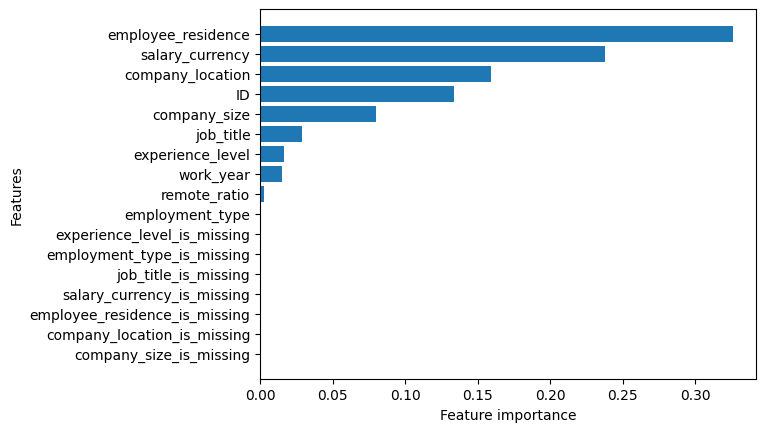

In [177]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [181]:
df.company_size.value_counts()

M    3153
L     454
S     148
Name: company_size, dtype: int64

In [182]:
df.employee_residence.value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64